<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


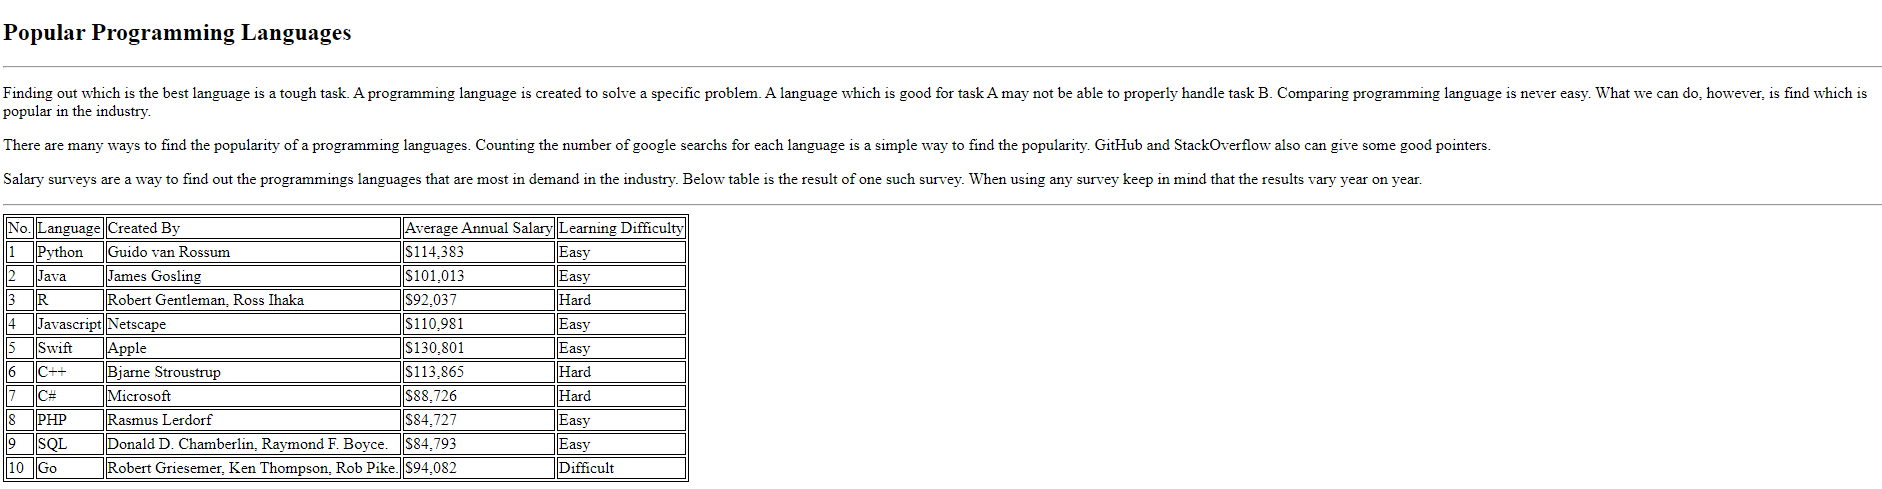

Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import pandas as pd
import requests

Download the webpage at the url


In [3]:
#your code goes here
r = requests.get(url)

In [4]:
#let's check the response
r

<Response [200]>

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(r.text, "html5lib")

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here

table = soup.find("table")


In [7]:
#Let's look into the first row, to see the headers
table.find('tr')

<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>

In [8]:
df = pd.DataFrame

In [9]:
#find which colums have the "Language" and "Average Annual Salary"
headers = table.find('tr')  #gets the first row of the table, which is the header

for i, column in enumerate(headers.find_all('td')):

    if column.getText() == 'Language':
        Languagecol = i

    if column.getText() == 'Average Annual Salary':
        SalaryCol = i

print('Lang Row: ', Languagecol)
print('Salary Row: ', SalaryCol)

    

Lang Row:  1
Salary Row:  3


In [20]:

df_new_row = pd.DataFrame({'Language': [2], 'Average Annual Salary': [2]})
df_new_row.head()


,Language,Average Annual Salary
0,2,2


In [30]:
# Define the headers for the DataFrame
df_header = ['Language', 'Average Annual Salary']

# Initialize an empty DataFrame with the defined headers
df = pd.DataFrame(columns=df_header)

# Iterate over each row in the HTML table
for i, row in enumerate(table.find_all('tr')):
    # Skip the header row
    if i != 0:
        # Find all 'td' elements in the row
        cols = row.find_all('td')
        # Extract the text for 'Language' and 'Average Annual Salary' columns
        language_value = cols[Languagecol].getText()
        Salary_value = cols[SalaryCol].getText()
        # Create a new DataFrame for the extracted row data
        df_new_row = pd.DataFrame({'Language': [language_value], 'Average Annual Salary': [Salary_value]})
        # Display the new row (for debugging purposes)
        df_new_row.head()
        # Concatenate the new row to the existing DataFrame
        df = pd.concat([df, df_new_row])

# Set the 'Language' column as the index of the DataFrame
df.set_index("Language", inplace=True)

# Display the final DataFrame
df.sort_values(by = 'Average Annual Salary')


,Average Annual Salary
Language,
Java,"$101,013"
Javascript,"$110,981"
C++,"$113,865"
Python,"$114,383"
Swift,"$130,801"
PHP,"$84,727"
SQL,"$84,793"
C#,"$88,726"
R,"$92,037"


Save the scrapped data into a file named *popular-languages.csv*


In [27]:
# your code goes here
df.to_csv('popular-languages.csv')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
